In [1]:
import numpy as np
import pandas as pd
import time
import datetime

np.random.seed(12)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.unicode_minus']=False
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('data_set_v2.csv')
# ['scopus' 'doi' 'title' 'type' 'year' 'source' 'page' 'volume'
#  'reader_count' 'link' 'given-name' 'sur_name' 'citedby_count' 'h_index'
#  'doc_total' 'citeby_doc' 'coauthors_total']
data = data.drop(['scopus','doi'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 15 columns):
title              5236 non-null object
type               5236 non-null object
year               5236 non-null float64
source             5229 non-null object
page               5186 non-null object
volume             5225 non-null float64
reader_count       5237 non-null int64
link               5236 non-null object
given-name         5235 non-null object
sur_name           5236 non-null object
citedby_count      5236 non-null float64
h_index            5236 non-null float64
doc_total          5236 non-null float64
citedby_doc        5236 non-null float64
coauthors_total    5236 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 613.8+ KB


In [3]:
data = data.drop(['title','source','link','page','volume','given-name','sur_name'],axis=1)
data.drop_duplicates()
data = data.dropna(how='any')
data.info()
# Features to represent the first author’s academic capital consists of 
# 1. h-index, 
# 2. cited by count, 
# 3. document count,
# 4. cited by document count,
# 5. co-authors count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5236 entries, 0 to 5235
Data columns (total 8 columns):
type               5236 non-null object
year               5236 non-null float64
reader_count       5236 non-null int64
citedby_count      5236 non-null float64
h_index            5236 non-null float64
doc_total          5236 non-null float64
citedby_doc        5236 non-null float64
coauthors_total    5236 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 368.2+ KB


In [4]:
data.describe()

,year,reader_count,citedby_count,h_index,doc_total,citedby_doc,coauthors_total
count,5236.000000,5236.000000,5236.000000,5236.000000,5236.000000,5236.000000,5236.000000
mean,2010.637701,43.139419,23.066845,11.831742,50.631589,856.325630,41.899160
std,3.042134,60.909324,41.773311,10.557947,78.606240,1929.720541,42.581939
min,2005.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,2008.000000,12.000000,5.000000,5.000000,12.000000,86.000000,11.000000
50%,2011.000000,25.000000,12.000000,9.000000,27.000000,273.000000,26.000000
75%,2013.000000,52.000000,25.000000,15.000000,59.000000,806.000000,56.000000
max,2015.000000,1570.000000,1156.000000,115.000000,1159.000000,37865.000000,150.000000


In [5]:
sum_type = data.groupby('type').size()
print(sum_type)
sum_type.describe()

type
book                         1
conference_proceedings     158
generic                    238
journal                   4789
magazine_article            48
newspaper_article            2
dtype: int64


count       6.000000
mean      872.666667
std      1920.893299
min         1.000000
25%        13.500000
50%       103.000000
75%       218.000000
max      4789.000000
dtype: float64

In [6]:
sum_year = data.groupby('year').size()
print(sum_year)
sum_year.describe()

year
2005.0    329
2006.0    321
2007.0    376
2008.0    404
2009.0    444
2010.0    536
2011.0    496
2012.0    537
2013.0    643
2014.0    601
2015.0    549
dtype: int64


count     11.000000
mean     476.000000
std      108.814521
min      321.000000
25%      390.000000
50%      496.000000
75%      543.000000
max      643.000000
dtype: float64

Text(0,0.5,'reader_count')

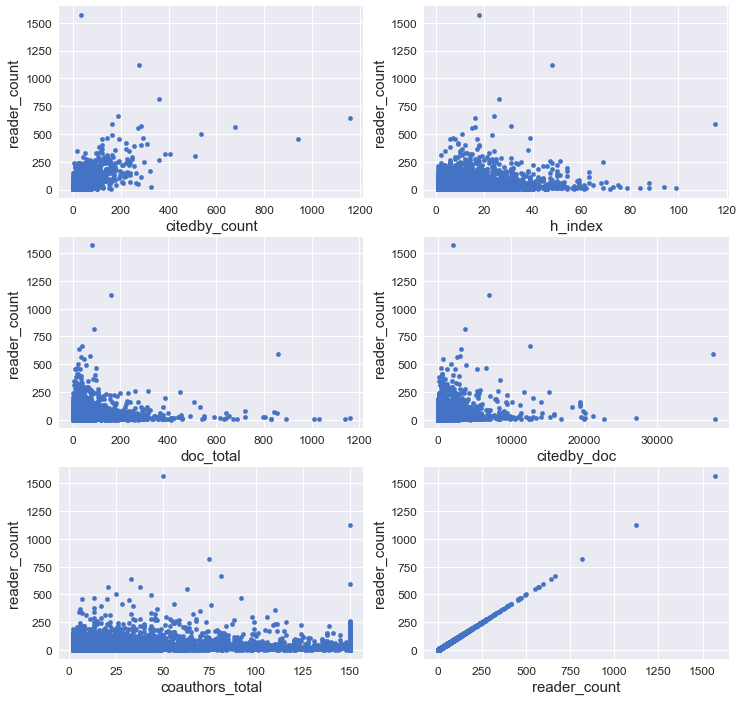

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
# citedby_count
ax1 = data.plot.scatter(x='citedby_count', y='reader_count', color='#4473C5', fontsize=12, ax=axes[0,0])
ax1.set_xlabel('citedby_count', fontsize=15)
ax1.set_ylabel('reader_count', fontsize=15)
# h_index
ax2 = data.plot.scatter(x='h_index', y='reader_count', color='#4473C5', fontsize=12, ax=axes[0,1])
ax2.set_xlabel('h_index', fontsize=15)
ax2.set_ylabel('reader_count', fontsize=15)
# doc_total
ax3 = data.plot.scatter(x='doc_total', y='reader_count', color='#4473C5', fontsize=12, ax=axes[1,0])
ax3.set_xlabel('doc_total', fontsize=15)
ax3.set_ylabel('reader_count', fontsize=15)
# citedby_doc
ax4 = data.plot.scatter(x='citedby_doc', y='reader_count', color='#4473C5', fontsize=12, ax=axes[1,1])
ax4.set_xlabel('citedby_doc', fontsize=15)
ax4.set_ylabel('reader_count', fontsize=15)
# coauthors_total
ax5 = data.plot.scatter(x='coauthors_total', y='reader_count', color='#4473C5', fontsize=12, ax=axes[2,0])
ax5.set_xlabel('coauthors_total', fontsize=15)
ax5.set_ylabel('reader_count', fontsize=15)
# reader_count
ax6 = data.plot.scatter(x='reader_count', y='reader_count', color='#4473C5', fontsize=12, ax=axes[2,1]);
ax6.set_xlabel('reader_count', fontsize=15)
ax6.set_ylabel('reader_count', fontsize=15)

Text(-3.075,0.5,'reader_count')

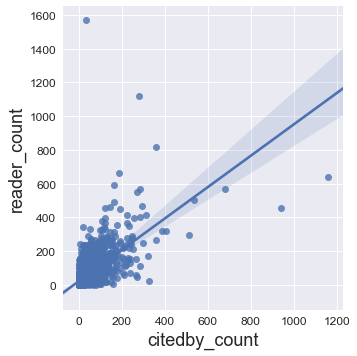

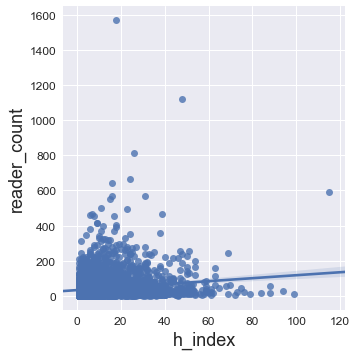

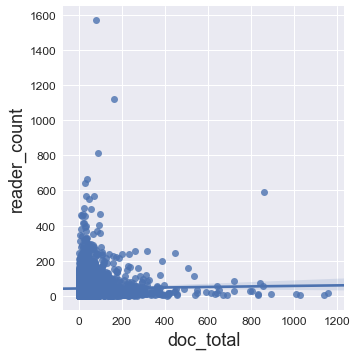

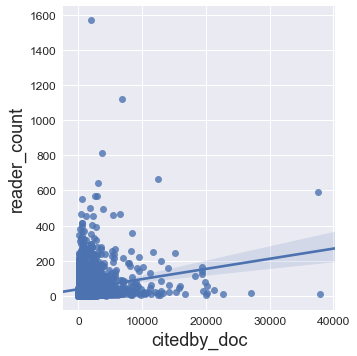

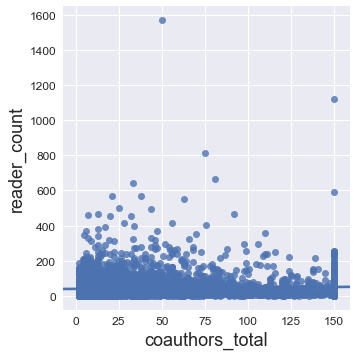

In [9]:
matplotlib.rc("legend", fontsize=20)

JG1 = sns.lmplot("citedby_count", "reader_count", data=data, size=5)
plt.xlabel('citedby_count', fontsize=18)
plt.ylabel('reader_count', fontsize=18)

JG2 = sns.lmplot("h_index", "reader_count", data=data, size=5)
plt.xlabel('h_index', fontsize=18)
plt.ylabel('reader_count', fontsize=18)

JG3 = sns.lmplot("doc_total", "reader_count", data=data, size=5)
plt.xlabel('doc_total', fontsize=18)
plt.ylabel('reader_count', fontsize=18)

JG4 = sns.lmplot("citedby_doc", "reader_count", data=data, size=5)
plt.xlabel('citedby_doc', fontsize=18)
plt.ylabel('reader_count', fontsize=18)

JG5 = sns.lmplot("coauthors_total", "reader_count", data=data, size=5)
plt.xlabel('coauthors_total', fontsize=18)
plt.ylabel('reader_count', fontsize=18)

Text(280.143,0.5,'reader_count')

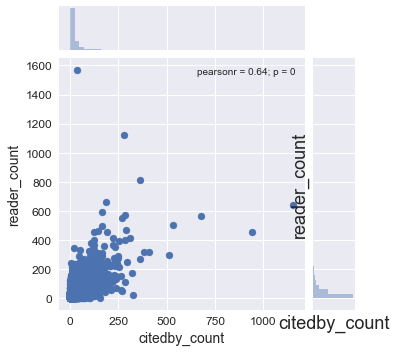

In [8]:
sns.jointplot(x="citedby_count", y="reader_count", data=data, size=5)
plt.xlabel('citedby_count', fontsize=18)
plt.ylabel('reader_count', fontsize=18)

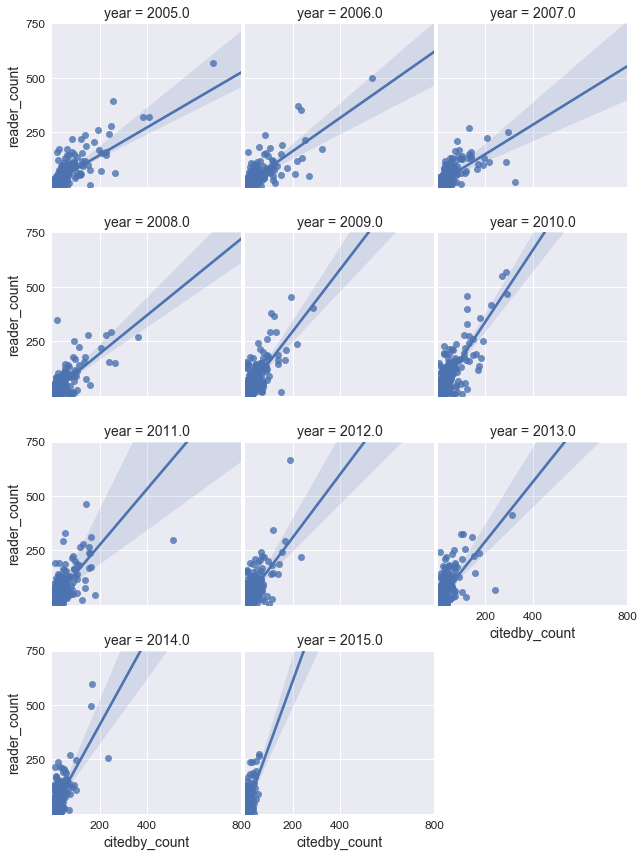

In [10]:
g = sns.lmplot(x='citedby_count', y='reader_count', col='year',data=data, col_wrap=3, size=3)
g = g.set(xlim=(0, 800), ylim=(0, 750),xticks=[200, 400, 800], yticks=[250, 500, 750]).fig.subplots_adjust(wspace=.02)

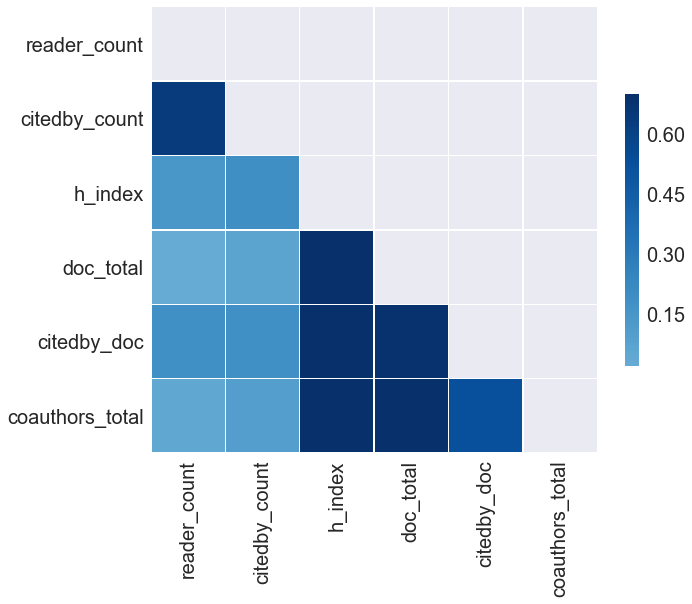

In [11]:
data0 = data[['reader_count', 'citedby_count','h_index', 'doc_total', 'citedby_doc', 'coauthors_total']]
corr = data0.corr()

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.7,
            center=0,square=True, linewidths=.5,
            cbar_kws={"shrink": .5},ax=ax)

In [12]:
corr

,reader_count,citedby_count,h_index,doc_total,citedby_doc,coauthors_total
reader_count,1.000000,0.638344,0.146880,0.018970,0.183011,0.050209
citedby_count,0.638344,1.000000,0.189845,0.065543,0.184979,0.100278
h_index,0.146880,0.189845,1.000000,0.772579,0.825237,0.751088
doc_total,0.018970,0.065543,0.772579,1.000000,0.681394,0.704949
citedby_doc,0.183011,0.184979,0.825237,0.681394,1.000000,0.529499
coauthors_total,0.050209,0.100278,0.751088,0.704949,0.529499,1.000000


In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, matthews_corrcoef
from sklearn.linear_model import LinearRegression

X = data0[['citedby_count']]
y = data0[['reader_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
      
print('Coefficients:', linreg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.3f' % r2_score(y_test, y_pred))
print(model.get_params(deep=True))

(3665, 1) (3665, 1)
(1571, 1) (1571, 1)
Coefficients: [[0.93099192]]
Mean squared error: 1631.86
Variance score: 0.476
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [14]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
res = model.fit()
res.params
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           reader_count   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     3923.
Date:                Mon, 09 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:44:10   Log-Likelihood:                -19758.
No. Observations:                3665   AIC:                         3.952e+04
Df Residuals:                    3664   BIC:                         3.952e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
citedby_count     1.1522      0.018     62.636

In [ ]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(data0)